## Sentiment Analysis using deep learning

Highlights:  
Words in the training dataset were tokenized, lemmatized and stemmatized   
convert text to word embeddings ( using word2vec from )

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec,doc2vec
from gensim.test.utils import get_tmpfile
import smart_open
import csv
import tensorflow as tf
from tensorflow import keras
from gensim.models import KeyedVectors
import datetime
from pathlib import Path
from sklearn.model_selection import train_test_split

In [16]:
input_file_sentiment="E:\\python_projects\\Springboard\datasets\\twitter_sentiment140\\training_140_sentiment.csv"

In [17]:
sentiment_colls=['sentiment','tweet_id','tweet_date','query','username','tweet']
tweet_df=pd.read_csv(input_file_sentiment,encoding='cp1252',names=sentiment_colls,usecols=['sentiment','tweet'])

In [23]:
tweet_df

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [24]:
def cleanse_tweet(line):
    #remove any @ words
    tweet_no_refs=re.sub(r'@\S+|#\S+','',line)

    #remove any non alphanumeric character  or punctuations
    tweet_no_punctuation=re.sub(r'[^\w\s]','',tweet_no_refs)

    #remove url links
    tweet_no_urls=re.sub(r'https?\S+','',tweet_no_punctuation)  
       
    #remove numerals
    tweet_no_numerals=re.sub(r'[0-9]+','',tweet_no_urls)

    #remove stopwords
    tweet_tokens=[word.lower() for word in tweet_no_numerals.split()]
        
    return tweet_tokens

In [25]:
tweet_df['simple_preprocess']  = tweet_df['tweet'].apply(lambda x:simple_preprocess(x) )

In [26]:
tweet_df['manual_preprocess']=tweet_df['tweet'].apply(lambda x:cleanse_tweet(x))

In [27]:
tweet_df

,sentiment,tweet,simple_preprocess,manual_preprocess
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, http, twitpic, com, zl, awww, tha...","[awww, thats, a, bummer, you, shoulda, got, da..."
1,0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, can, update, his, facebo...","[is, upset, that, he, cant, update, his, faceb..."
2,0,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, many, times, for, the, ball,...","[i, dived, many, times, for, the, ball, manage..."
3,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, body, feels, itchy, and, like, its..."
4,0,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, it, not, behaving, at, a...","[no, its, not, behaving, at, all, im, mad, why..."
...,...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,"[just, woke, up, having, no, school, is, the, ...","[just, woke, up, having, no, school, is, the, ..."
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,"[thewdb, com, very, cool, to, hear, old, walt,...","[thewdbcom, very, cool, to, hear, old, walt, i..."
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,"[are, you, ready, for, your, mojo, makeover, a...","[are, you, ready, for, your, mojo, makeover, a..."
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,"[happy, th, birthday, to, my, boo, of, alll, t...","[happy, th, birthday, to, my, boo, of, alll, t..."


In [28]:
def tweet_lemmatize(tweet):
    return  [WordNetLemmatizer().lemmatize(word) for word in tweet]

In [29]:
tweet_df['lemma']=tweet_df['manual_preprocess'].apply(lambda x:tweet_lemmatize(x) )

In [30]:
tweet_df

,sentiment,tweet,simple_preprocess,manual_preprocess,lemma
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, http, twitpic, com, zl, awww, tha...","[awww, thats, a, bummer, you, shoulda, got, da...","[awww, thats, a, bummer, you, shoulda, got, da..."
1,0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, can, update, his, facebo...","[is, upset, that, he, cant, update, his, faceb...","[is, upset, that, he, cant, update, his, faceb..."
2,0,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, many, times, for, the, ball,...","[i, dived, many, times, for, the, ball, manage...","[i, dived, many, time, for, the, ball, managed..."
3,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, body, feels, itchy, and, like, its...","[my, whole, body, feel, itchy, and, like, it, ..."
4,0,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, it, not, behaving, at, a...","[no, its, not, behaving, at, all, im, mad, why...","[no, it, not, behaving, at, all, im, mad, why,..."
...,...,...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,"[just, woke, up, having, no, school, is, the, ...","[just, woke, up, having, no, school, is, the, ...","[just, woke, up, having, no, school, is, the, ..."
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,"[thewdb, com, very, cool, to, hear, old, walt,...","[thewdbcom, very, cool, to, hear, old, walt, i...","[thewdbcom, very, cool, to, hear, old, walt, i..."
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,"[are, you, ready, for, your, mojo, makeover, a...","[are, you, ready, for, your, mojo, makeover, a...","[are, you, ready, for, your, mojo, makeover, a..."
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,"[happy, th, birthday, to, my, boo, of, alll, t...","[happy, th, birthday, to, my, boo, of, alll, t...","[happy, th, birthday, to, my, boo, of, alll, t..."


### Create label

In [31]:
sentiment_colls=['sentiment','tweet_id','tweet_date','query','username','tweet']
y=pd.read_csv(input_file_sentiment,encoding='cp1252',names=sentiment_colls,usecols=['sentiment'])

In [32]:
y['sentiment']=y['sentiment'].apply(lambda x: 1 if x==4 else 0)

In [33]:
y=y['sentiment'].values

In [34]:
y.reshape(-1,1)
y.shape

(1600000,)

### Split into train and test

In [46]:
X_train_text,X_test_text,y_train,y_test=train_test_split(tweet_df['lemma'],y,test_size=0.3,random_state=42)

In [47]:
print(f"X_train : {X_train_text.shape}")
print(f"X_test : {X_test_text.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (1120000,)
X_test : (480000,)
y_train : (1120000,)
y_test : (480000,)


In [48]:
unique,counts=np.unique(y_train,return_counts=True)
result = np.column_stack((unique, counts))
result

array([[     0, 560639],
       [     1, 559361]], dtype=int64)

### Build and Train a doc2vec model on the train data

In [222]:
start_time=datetime.datetime.now()
print(f'start vector:{start_time}')
documents = [doc2vec.TaggedDocument(doc, [i]) for i, doc in enumerate(X_train_text)]
print(f'start model:{datetime.datetime.now()}')
model = doc2vec.Doc2Vec(documents, vector_size=1000, window=2, min_count=1, workers=4,epochs=20)
print(f"time_taken",{datetime.datetime.now()- start_time})

start vector:2022-08-09 13:47:24.186596
start model:2022-08-09 13:48:07.857007
time_taken {datetime.timedelta(seconds=3804, microseconds=698699)}


### Save the train model to disk

In [6]:
fname = get_tmpfile(Path.cwd() / 'sentiment_doc2vec_model_train')


In [224]:
model.save(fname)

1120000

In [7]:
model=doc2vec.Doc2Vec.load(fname)

In [8]:
model

### Creating a list of vectors on train data

In [9]:
start_time=datetime.datetime.now()
print(f'start vector:{start_time}')
X_train=[]
for i in range(len(model.dv)):
    X_train.append(model.dv[i])      
print(f"time_taken",{datetime.datetime.now()- start_time})       

start vector:2022-08-10 11:29:05.927433
time_taken {datetime.timedelta(seconds=3, microseconds=765003)}


In [10]:
X_train=np.array(X_train)

In [11]:
type(X_train)
#print(X_train.shape)

numpy.ndarray

## Creating a Deep Neural Network

In [38]:
def create_model_keras(learning_rate=0.01,input_shape=[1000,],nodes=300):
    model_keras=tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(nodes,activation="relu"),
    keras.layers.Dense(nodes,activation="relu"),
    keras.layers.Dense(nodes,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
    ])
    model_keras.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
                   metrics=["accuracy"])
    return model_keras

In [39]:
model_keras=create_model_keras()
model_keras.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 300)               300300    
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 300)               90300     
                                                                 
 dense_7 (Dense)             (None, 1)                 301       
                                                                 
Total params: 481,201
Trainable params: 481,201
Non-trainable params: 0
_________________________________________________________________


In [40]:
history=model_keras.fit(X_train ,y_train,epochs=40,validation_split=0.2)

Epoch 1/40
28000/28000 [==============================] - 160s 6ms/step - loss: 0.5654 - accuracy: 0.7088 - val_loss: 0.5432 - val_accuracy: 0.7245
Epoch 2/40
28000/28000 [==============================] - 156s 6ms/step - loss: 0.5324 - accuracy: 0.7321 - val_loss: 0.5305 - val_accuracy: 0.7316
Epoch 3/40
28000/28000 [==============================] - 156s 6ms/step - loss: 0.5187 - accuracy: 0.7416 - val_loss: 0.5217 - val_accuracy: 0.7378
Epoch 4/40
28000/28000 [==============================] - 155s 6ms/step - loss: 0.5080 - accuracy: 0.7492 - val_loss: 0.5131 - val_accuracy: 0.7457
Epoch 5/40
28000/28000 [==============================] - 157s 6ms/step - loss: 0.4999 - accuracy: 0.7547 - val_loss: 0.5078 - val_accuracy: 0.7492
Epoch 6/40
28000/28000 [==============================] - 156s 6ms/step - loss: 0.4933 - accuracy: 0.7593 - val_loss: 0.5151 - val_accuracy: 0.7460
Epoch 7/40
28000/28000 [==============================] - 157s 6ms/step - loss: 0.4878 - accuracy: 0.7626 - val_

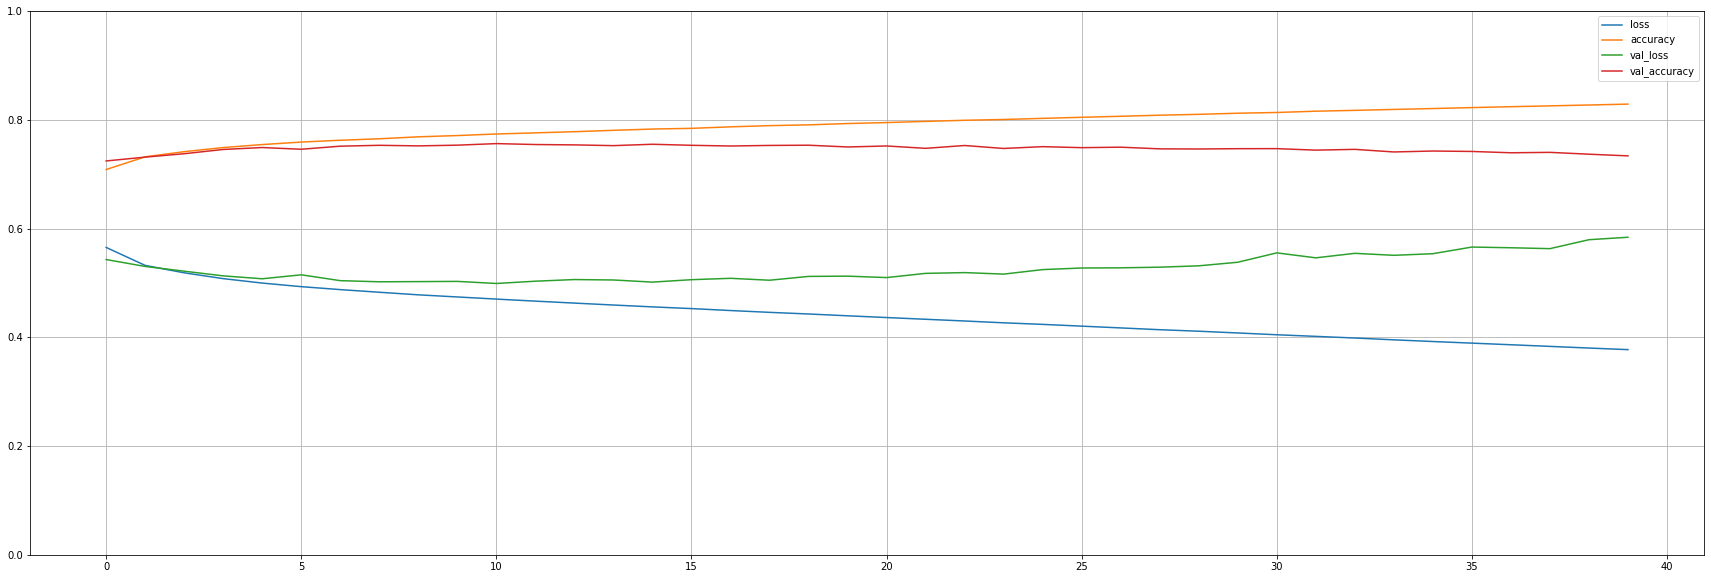

In [41]:
pd.DataFrame(history.history).plot(figsize=(30,10))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

### Evaluate the model

In [50]:
start_time=datetime.datetime.now()
print(f'start vector:{start_time}')
X_test=[]

for i,row in enumerate(X_test_text):
    X_test.append(model.infer_vector(row))   
print(f"time_taken",{datetime.datetime.now()- start_time})   

start vector:2022-08-10 15:36:49.353620
time_taken {datetime.timedelta(seconds=1884, microseconds=605897)}


In [51]:
X_test=np.array(X_test)

In [52]:
X_test

array([[ 0.00909377, -0.01993608, -0.05660552, ...,  0.09465026,
        -0.01763649,  0.03389749],
       [ 0.02798623,  0.03557641, -0.10588057, ...,  0.10306751,
        -0.01005493, -0.10774864],
       [-0.05694797,  0.18685114,  0.08733655, ...,  0.11555881,
        -0.06114863,  0.16946957],
       ...,
       [-0.03654655,  0.0199746 ,  0.04411161, ..., -0.04069826,
         0.0014585 , -0.01750894],
       [-0.05230367,  0.06802929, -0.02714214, ...,  0.11767636,
        -0.01741678, -0.20336697],
       [-0.02765312, -0.08477288, -0.03228426, ...,  0.113301  ,
         0.0672057 , -0.09902781]], dtype=float32)

### Save model

In [43]:
model.save("keras_model_doc2vec.h5")

In [53]:
model_keras.evaluate(X_test,y_test)


15000/15000 [==============================] - 41s 3ms/step - loss: 0.7557 - accuracy: 0.6793


[0.7556900382041931, 0.6793458461761475]

### Prediction of sentiment

In [64]:
text_pred='this was a bad day'
text_tokenize=text_pred.split(' ')
text_vectorize=model.infer_vector(text_tokenize).reshape(-1,1000)
print(model_keras.predict(text_vectorize))


1/1 [==============================] - 0s 41ms/step
[[0.15148896]]
